In [3]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

## Importing the Data

In [4]:
df = pd.read_csv(os.path.join("../", "data", "kc_house_data.csv"))

In [7]:
df.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
15856  2402100895   6/25/2014   640000.0        33       1.75         1620   
8748   1773100755   8/21/2014   520000.0        11       3.00         3000   
13301   627300145   8/14/2014  1150000.0        10       5.25         4590   
19239  8812401450  12/29/2014   660000.0        10       3.00         2920   
15147  5566100170  10/29/2014   650000.0        10       2.00         3610   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
15856      6000     1.0         0.0   0.0  ...      7        1040   
8748       4960     2.0         0.0   0.0  ...      7        2400   
13301     10920     1.0         0.0   2.0  ...      9        2500   
19239      3745     2.0         0.0   0.0  ...      7        1860   
15147     11914     2.0         0.0   0.0  ...      7        3010   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
15856          580.0     1947           0.0    98103  47.6878 -122.331   
8748           600.0     1918        1999.0    98106  47.5560 -122.363   
13301         2090.0     2008           0.0    98004  47.5861 -122.113   
19239         1060.0     1913           0.0    98105  47.6635 -122.320   
15147          600.0     1958           0.0    98006  47.5705 -122.175   

       sqft_living15  sqft_lot15  
15856           1330        4700  
8748            1420        4960  
13301           2730       10400  
19239           1810        3745  
15147           2040       11914  

[5 rows x 21 columns]

In [6]:
df = df.sort_values(by=['bedrooms'], ascending = False)

In [4]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Initial Data Preparation
Fix column names from the origrinal dataframe that has extra paces and other irregularities.

In [6]:
df = df.rename(columns={'id' : 'ID', 
                         'date' : 'Date', 
                         'price' : 'Price', 
                         'bedrooms' : 'Bedrooms', 
                         'bathrooms' : 'Bathrooms', 
                         'sqft_living' : 'Sqft_Living',
                         'sqft_lot': 'Sqft_Lot', 
                         'floors' : 'Floors', 
                         'waterfront' : 'Waterfront', 
                         'view' : 'View', 
                         'condition' : 'Condition', 
                         'grade' : 'Grade',
                         'sqft_above' : 'Sqft_Above', 
                         'sqft_basement' : 'Sqft_Basement', 
                         'yr_built' : 'Yr_Built', 
                         'yr_renovated' : 'Yr_Renovated', 
                         'zipcode': 'Zipcode',
                         'lat' : 'Lat', 
                         'long' : 'Long', 
                         'sqft_living15' : 'Sqft_Living15', 
                         'sqft_lot15' : 'Sqft_Lot15'})

In [7]:
df.head()

ID        Date     Price  Bedrooms  Bathrooms  Sqft_Living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   Sqft_Lot  Floors  Waterfront  View  ...  Grade  Sqft_Above  Sqft_Basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  Yr_Built  Yr_Renovated  Zipcode      Lat     Long  Sqft_Living15  Sqft_Lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [8]:
df.dtypes

ID                 int64
Date              object
Price            float64
Bedrooms           int64
Bathrooms        float64
Sqft_Living        int64
Sqft_Lot           int64
Floors           float64
Waterfront       float64
View             float64
Condition          int64
Grade              int64
Sqft_Above         int64
Sqft_Basement     object
Yr_Built           int64
Yr_Renovated     float64
Zipcode            int64
Lat              float64
Long             float64
Sqft_Living15      int64
Sqft_Lot15         int64
dtype: object

'sqft_basement' has a datatype of 'object'. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             21597 non-null  int64  
 1   Date           21597 non-null  object 
 2   Price          21597 non-null  float64
 3   Bedrooms       21597 non-null  int64  
 4   Bathrooms      21597 non-null  float64
 5   Sqft_Living    21597 non-null  int64  
 6   Sqft_Lot       21597 non-null  int64  
 7   Floors         21597 non-null  float64
 8   Waterfront     19221 non-null  float64
 9   View           21534 non-null  float64
 10  Condition      21597 non-null  int64  
 11  Grade          21597 non-null  int64  
 12  Sqft_Above     21597 non-null  int64  
 13  Sqft_Basement  21597 non-null  object 
 14  Yr_Built       21597 non-null  int64  
 15  Yr_Renovated   17755 non-null  float64
 16  Zipcode        21597 non-null  int64  
 17  Lat            21597 non-null  float64
 18  Long  

In [10]:
df.columns

Index(['ID', 'Date', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft_Living',
       'Sqft_Lot', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade',
       'Sqft_Above', 'Sqft_Basement', 'Yr_Built', 'Yr_Renovated', 'Zipcode',
       'Lat', 'Long', 'Sqft_Living15', 'Sqft_Lot15'],
      dtype='object')

In [18]:
#reorder so the price is the first column (change column with targeted value)
df = df.set_index('Price').reset_index()

In [19]:
df.head()

Price          ID        Date  Bedrooms  Bathrooms  Sqft_Living  \
0  221900.0  7129300520  10/13/2014         3       1.00         1180   
1  538000.0  6414100192   12/9/2014         3       2.25         2570   
2  180000.0  5631500400   2/25/2015         2       1.00          770   
3  604000.0  2487200875   12/9/2014         4       3.00         1960   
4  510000.0  1954400510   2/18/2015         3       2.00         1680   

   Sqft_Lot  Floors  Waterfront  View  ...  Grade  Sqft_Above  Sqft_Basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  Yr_Built  Yr_Renovated  Zipcode      Lat     Long  Sqft_Living15  Sqft_Lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

### Cleaning Dataframes

In [20]:
# See if there is any null values in the dataframe
df.isna().sum()

Price               0
ID                  0
Date                0
Bedrooms            0
Bathrooms           0
Sqft_Living         0
Sqft_Lot            0
Floors              0
Waterfront       2376
View               63
Condition           0
Grade               0
Sqft_Above          0
Sqft_Basement       0
Yr_Built            0
Yr_Renovated     3842
Zipcode             0
Lat                 0
Long                0
Sqft_Living15       0
Sqft_Lot15          0
dtype: int64

Columns that has null values:

1. Waterfront
2. View
3. Yr_Renovated

## Data Understanding

In [21]:
corr = df.corr()

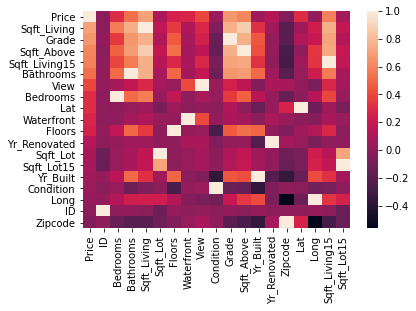

In [27]:
#looking for variables that are highly correlated with the targeted variable but not highly correlate dwith other input variables
sns.heatmap(corr);

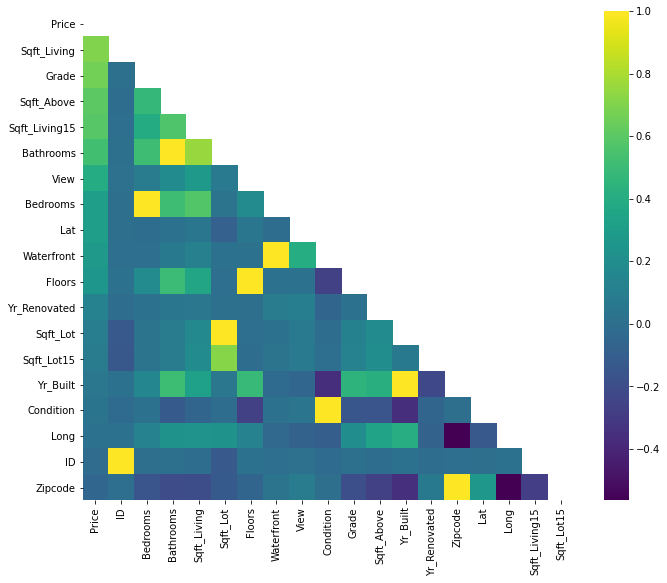

In [25]:
corr = corr.sort_values(by='Price', ascending=False)
mask = np.triu(np.ones_like(corr,dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

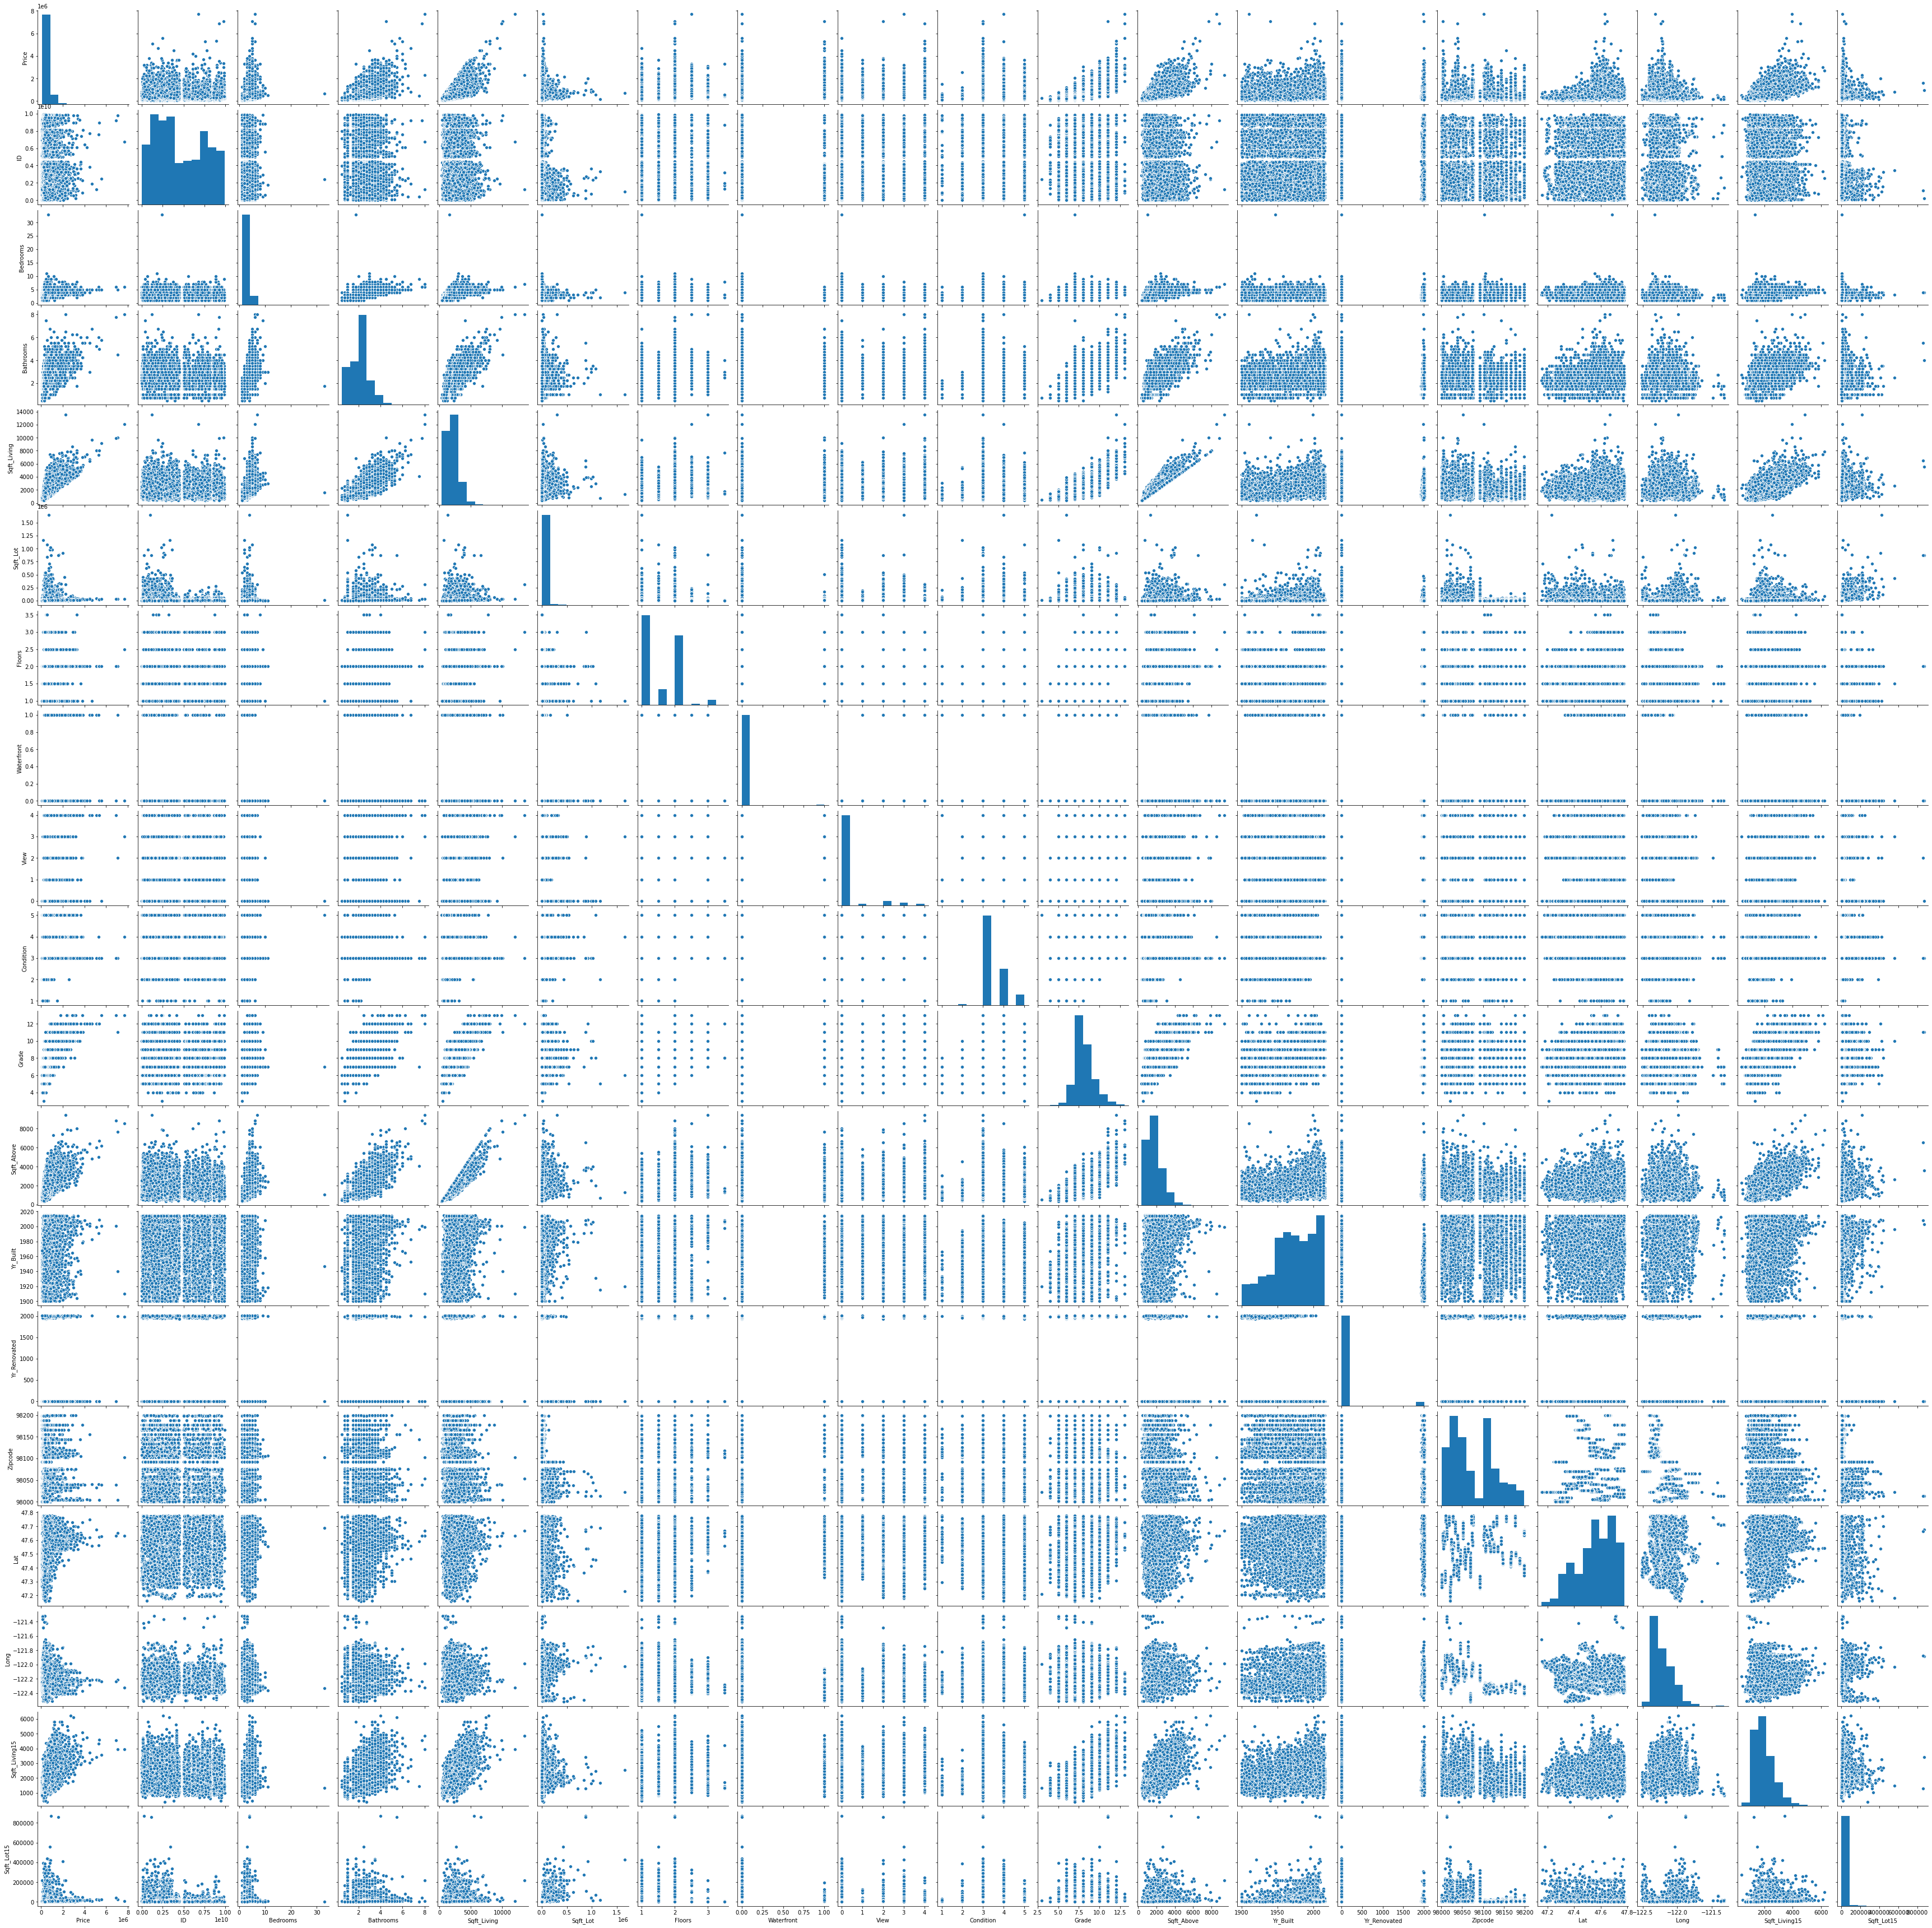

In [28]:
sns.pairplot(df)

## First Simple Model

In [30]:
fsm_df = df[["Sqft_Living", "Price"]].copy()
fsm_df.dropna(inplace=True)

In [31]:
fsm = ols(formula="Price ~ Price", data=fsm_df)
fsm_results = fsm.fit()

In [32]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.010e+32
Date:                Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:55:54   Log-Likelihood:             3.8061e+05
No. Observations:               21597   AIC:                        -7.612e+05
Df Residuals:                   21595   BIC:                        -7.612e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.829e-10    6.5e-11     -4.351      0.000    -4.1e-10   -1.55e-10
Price          1.0000   9.95e-17      1e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                    19261.678   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1148479.220
Skew:                           4.077   Prob(JB):                         0.00
Kurtosis:                      37.782   Cond. No.                     1.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Evaluation

R-Squrared is 1